### Usando alguns datasets externos para calcular as distâncias entre determinados imóveis e os pontos do nosso conjunto. Primeiro, usaremos as estações de metrô da cidade do Rio de Janeiro, já que, por facilitar o transporte, a proximidade de uma área atendida por uma estação de metrô é um fator que pode agregar no valor do imóvel.

- Dados: https://www.data.rio/


# Distâncias até a estação de metrô mais próxima

- Dados: https://www.data.rio/datasets/esta%C3%A7%C3%B5es-metr%C3%B4


- Spatial Reference for CRS: https://spatialreference.org/ref/epsg/31983/proj4/

In [1]:
%matplotlib inline
import geopandas as gpd

In [35]:
def cria_dir(pasta:str, path='dados/processados/mapas'):
    '''
    Função para criar diretorios em um caminho especificado
    '''
    import os

    dir_ = f'{path}/{pasta}' 
    if not os.path.exists(dir_):
        os.makedirs(dir_)
    
    return dir_

In [74]:
metro = gpd.read_file('dados/originais/transporte/metro/Estacoes_Metro.geojson')

In [75]:
metro.head()

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,...,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (-43.36485 -22.80662)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.35845 -22.81627)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34964 -22.82452)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34326 -22.83148)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.33386 -22.84269)


In [82]:
metro.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [83]:
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [63]:
metro.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [8]:
metro.head()

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,...,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (667.827 7476.959)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (668.471 7475.883)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (669.365 7474.959)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (670.012 7474.182)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (670.963 7472.930)


In [44]:
metro.shape

(41, 23)

In [9]:
g_rj = gpd.read_file('dados/originais/RJ/RJ_Municipios_2019.shp')

In [10]:
g_rj.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3300100,Angra dos Reis,RJ,813.210,"MULTIPOLYGON (((-44.15109 -23.21602, -44.15076..."
1,3300159,Aperibé,RJ,94.542,"POLYGON ((-42.11437 -21.61204, -42.11394 -21.6..."
2,3300209,Araruama,RJ,638.150,"POLYGON ((-42.18249 -22.55269, -42.18221 -22.5..."
3,3300225,Areal,RJ,110.724,"POLYGON ((-43.17348 -22.25628, -43.17353 -22.2..."
4,3300233,Armação dos Búzios,RJ,70.978,"MULTIPOLYGON (((-41.91855 -22.81574, -41.91836..."


In [11]:
g_rj.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [12]:
g_rj = g_rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs ')

In [13]:
g_rj.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [14]:
g_rj = g_rj.loc[g_rj['NM_MUN'] == 'Rio de Janeiro']

In [17]:
geo_dados = gpd.read_file('dados/processados/mapas/RJ-DATASET/RJ-DATASET.shp')

<AxesSubplot:>

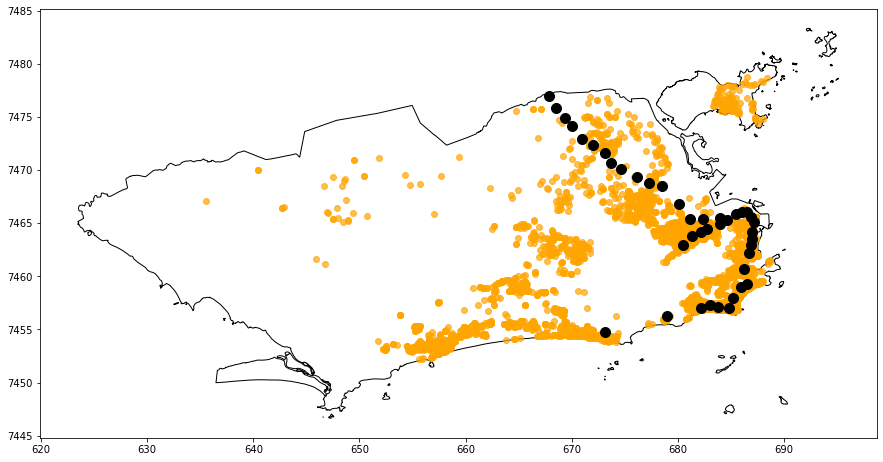

In [21]:
base = g_rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='orange', alpha=0.7)
metro.plot(ax=base, color='black', markersize=100)

In [23]:
geo_dados.iloc[0]

Area                                                 138
Bairro                          Recreio dos Bandeirantes
Cidade                                    Rio de Janeiro
Endereco                             Rua Vicente Scofano
Estado                                                RJ
Latitude                                      -23.016455
Longitude                                     -43.462946
Quartos                                                3
Suites                                                 1
Vagas                                                  3
Tipo                                         Apartamento
Transacao                                          Venda
Valor                                            1095000
geometry     POINT (657.5137068691058 7453.832425203198)
Name: 0, dtype: object

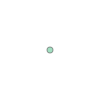

In [25]:
geo_dados.iloc[0]['geometry']

In [26]:
# Calcular as distâncias em linha reta, entre os pontos laranjas e o pontos onde estão localizadas as 
# estações do metrô e armazenar os pontos com a menor distância

distances = metro.distance(geo_dados.iloc[0]['geometry'])
distances

0     25.321516
1     24.623350
2     24.224237
3     23.881158
4     23.357575
5     23.523396
6     23.658163
7     23.401048
8     23.644084
9     24.209373
10    24.795188
11    25.596665
12    26.033173
13    26.295764
14    27.398579
15    28.659654
16    25.773027
17    26.716983
18    27.377518
19    30.455326
20    31.034097
21    31.466395
22    31.662650
23    31.695780
24    31.232661
25    31.026518
26    30.727260
27    30.401336
28    29.515734
29    29.476829
30    28.850631
31    29.407590
32    27.940690
33    28.901631
34    27.475584
35    24.743520
36    26.507063
37    25.728350
38    24.822792
39    21.589055
40    15.622939
dtype: float64

In [27]:
distances.min()

15.62293882499506

In [28]:
geo_dados['Dist_Metro'] = geo_dados['geometry'].apply(lambda x: metro.distance(x).min())

In [30]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_Metro
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),15.622939
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),7.530741
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),0.736973
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),10.718039
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),17.131159


In [31]:
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_Metro
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641
Dist_Metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000


In [33]:
# Guardando a correlação entre a distância até uma estação do metrô e o valor do imóvel
coef_vd = geo_dados['Valor'].corr(geo_dados['Dist_Metro'])

In [34]:
# Correlação negativa - significa que quanto maior a distância de uma estação do metrô, menor o valor do imóvel
coef_vd

-0.1956408316168689

In [36]:
diretorio = cria_dir('RJ-DATASET')
geo_dados.to_file(diretorio)

###  Atividade do curso



Utilizando o conjunto com os dados de localização das estações de metrô obtidas no portal DataRio (utilizadas no último vídeo), identifique as quatro estações de metrô mais próximas e as quatro estações de metrô mais distantes dos quatro pontos abaixo:

| Latitude	| Longitude |
| --------- |---------- |
| -22.9531	| -43.1884  |
| -23.0278	| -43.4665  |
| -22.8463	| -43.3007  |
| -22.8969	| -43.3165  |



Informe também as distâncias em quilômetros do ponto até as estações mais próximas e mais distantes.

In [37]:
from shapely.geometry import Point

In [84]:
d = {'Latitude': [-22.9531, -23.0278, -22.8463, -22.8969], 'Longitude': [-43.1884, -43.4665, -43.3007, -43.3165]}
d_geometry = [Point(x) for x in zip(d['Longitude'], d['Latitude'])]
d_crs = {'init': 'epsg:4326'}
df_atividade = gpd.GeoDataFrame(d, crs=d_crs, geometry=d_geometry)

C:\Users\halissonsg\Anaconda3\envs\panel\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [85]:
df_atividade.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [86]:
df_atividade = df_atividade.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [89]:
df_atividade['Dist_Min'] = df_atividade['geometry'].apply(lambda x: "{0:.2f} km".format(metro.distance(x).min()))
df_atividade['Metro_Perto'] = df_atividade['geometry'].apply(lambda x: metro['Nome'].iloc[metro.distance(x).idxmin()])
df_atividade['Dist_Max'] = df_atividade['geometry'].apply(lambda x: "{0:.2f} km".format(metro.distance(x).max()))
df_atividade['Metro_Longe'] = df_atividade['geometry'].apply(lambda x: metro['Nome'].iloc[metro.distance(x).idxmax()])

In [90]:
df_atividade

,Latitude,Longitude,geometry,Dist_Min,Metro_Perto,Dist_Max,Metro_Longe
0,-22.9531,-43.1884,POINT (685.741 7460.527),0.51 km,Botafogo,24.31 km,Pavuna
1,-23.0278,-43.4665,POINT (657.136 7452.580),16.12 km,Jardim Oceânico,32.51 km,Cinelândia
2,-22.8463,-43.3007,POINT (674.361 7472.491),1.53 km,Vicente de Carvalho,18.65 km,Ipanema / General Osório
3,-22.8969,-43.3165,POINT (672.676 7466.906),3.77 km,Engenho da Rainha,15.80 km,Cardeal Arcoverde
